# Pymaceuticals Inc.
---

### Analysis

- For this project, we first started by merging the mouse metadata and study results files into one dataframe. We then de-duped the data based off Mouse ID in order to streamline the data and ensure we have unique and accurate data for each mouse. After we did this, we then created multiple bar and pie charts that showed us which drug was  the most effective over time and how evenly split the genders between rats were. 
 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].count()
number_of_mice

1893

In [93]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
#duplicate_mice = merged_data[duplicate_mice]['Mouse ID'].unique
#duplicate_mice

<bound method Series.unique of 908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object>

In [108]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mice_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)]
#duplicate_mice_data
all_mice = merged_data.loc[merged_data['Mouse ID'] == 'g989']
all_mice
#df.loc[df['shield'] > 6]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [109]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = merged_data.drop(subset='Mouse ID', keep='first')
#clean_data

clean_data = merged_data[merged_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [110]:
# Checking the number of mice in the clean DataFrame.
number = len(clean_data['Mouse ID'].unique())
number

248

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary = summary.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var':'Tumor Volume Variance', 'std':'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err'})
summary                                                                        

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

TypeError: 'str' object is not callable

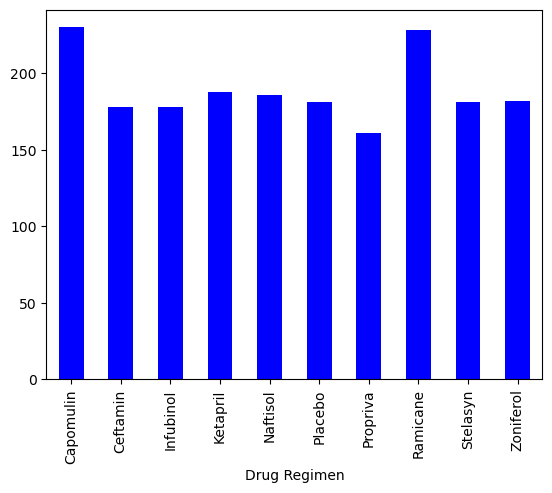

In [112]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = merged_data.groupby('Drug Regimen').size()
drug_regimen.plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

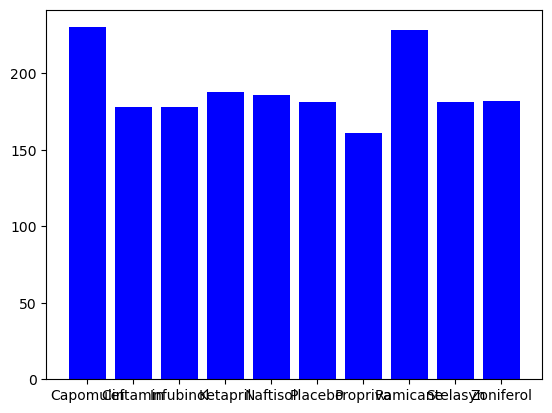

In [100]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = merged_data.groupby('Drug Regimen').size()
x_values = drug_regimen.index
y_values = drug_regimen.values
plt.bar(x_values, y_values, color = 'blue')
plt.xlabel = ('Drug Regimen')
plt.ylabel = ('# of Observed Mouse Timepoints')
plt.show()

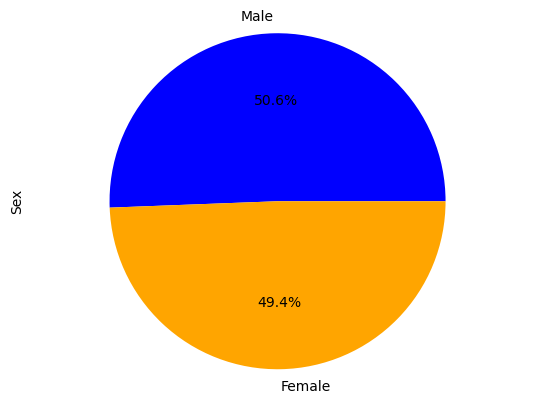

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = merged_data['Sex'].value_counts()
gender.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.axis('equal')
plt.show()

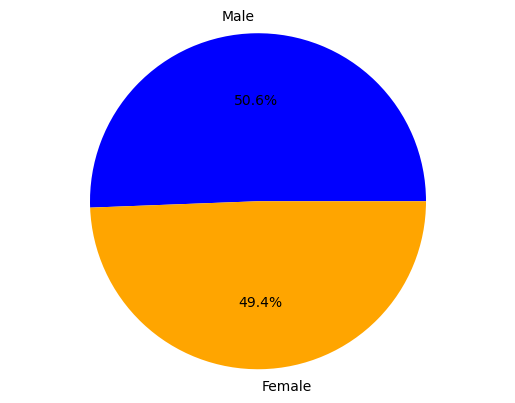

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = merged_data['Sex'].value_counts()
labels = gender_data.index
counts = gender_data.values
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_treatment = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_treatment.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(merged_data, last_timepoint, on=['Mouse ID', 'Timepoint'])
tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

TypeError: 'str' object is not callable

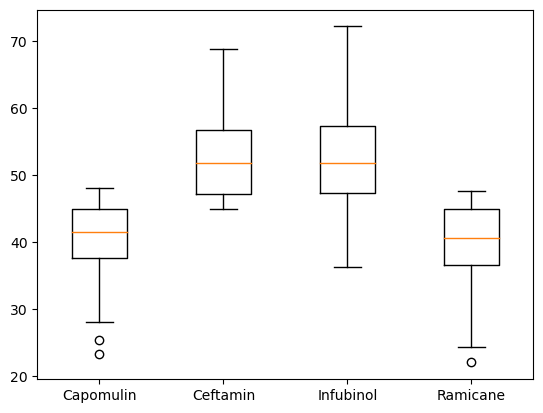

In [113]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatments)]
group_data = filtered_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
treatment_groups = group_data.values
plt.boxplot(treatment_groups)
plt.xticks(range(1, len(group_data) + 1), group_data.index)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

TypeError: 'str' object is not callable

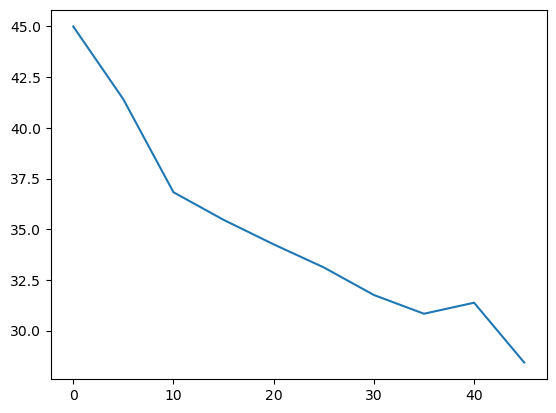

In [114]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "m601"
filtered_data = merged_data[(merged_data["Mouse ID"] == mouse_id) & (merged_data["Drug Regimen"] == "Capomulin")]
plt.plot(filtered_data["Timepoint"],filtered_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [ ]:
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


TypeError: 'str' object is not callable

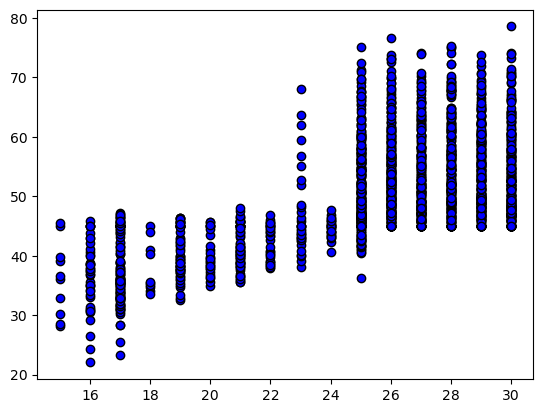

In [115]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = merged_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
#merged_data = pd.merge(clean_data, average_tumor_volume, on='Mouse ID')
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker = 'o', facecolors='blue', edgecolors='black')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

TypeError: 'str' object is not callable

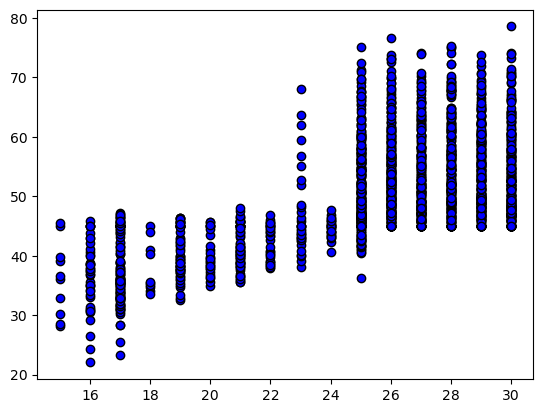

In [118]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker = "o", facecolors ='blue', edgecolors='black')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()